<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/Medidas_de_Desempe%C3%B1o_APTs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

In [51]:
BASE_SNAP = pd.read_excel("/content/Control de Comisión.xlsm", sheet_name="Base Snap",skiprows=1)
Indices= pd.read_excel("/content/Base Indices.xlsx", sheet_name="Datos")

In [ ]:
# Crea un DataFrame con las columnas de fecha y valor de la unidad
GYC = BASE_SNAP.iloc[:, [0, 2]]  # Columnas 1 (fecha) y 3 (valor de la unidad)
GYC.columns = ["Fecha", "Valor_Unidad"]
# Convierte la columna de fecha a datetime, ignorando errores
GYC["Fecha"] = pd.to_datetime(GYC["Fecha"], errors="coerce")

In [ ]:
# Crea un DataFrame con BANREP
Banrep = Indices.iloc[:, [0, 4]]  # Columnas 1 (fecha) y 3 (valor de la unidad)
Banrep.columns = ["Fecha", "BANREP"]
# Convierte la columna de fecha a datetime, ignorando errores
Banrep["Fecha"] = pd.to_datetime(Banrep["Fecha"], errors="coerce")

In [ ]:
Banrep.head()

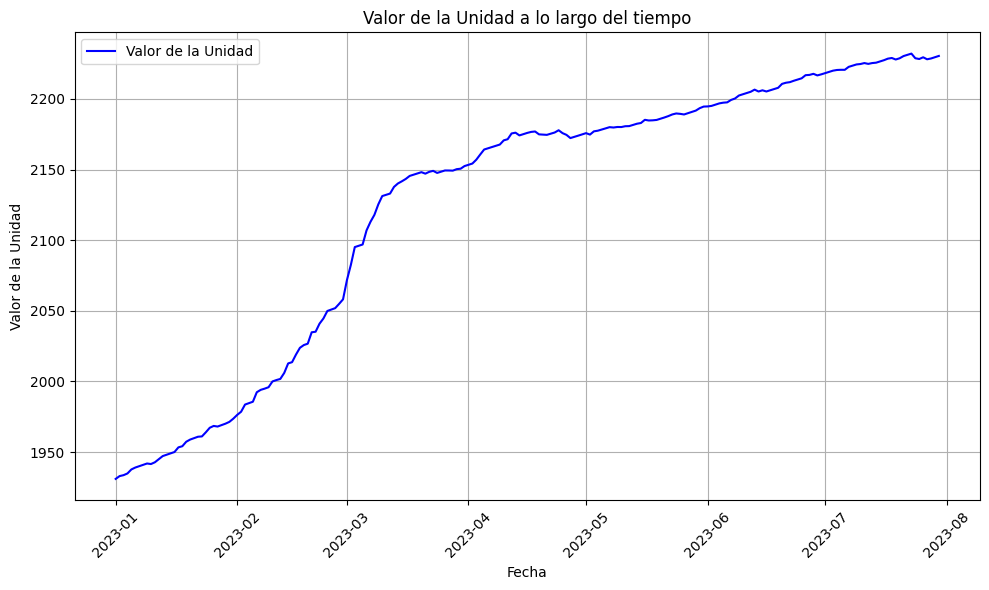

In [64]:
# Suponiendo que ya tienes GYC definido como DataFrame
plt.figure(figsize=(10, 6))  # Tamaño opcional para la figura
# Graficar los datos
plt.plot(GYC["Fecha"], GYC["Valor_Unidad"], linestyle='-', color='b', label='Valor de la Unidad')
# Configuraciones de la gráfica
plt.title('Valor de la Unidad a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor de la Unidad')
plt.legend()
plt.grid(True)
# Rotar las etiquetas del eje x para una mejor visualización de las fechas
plt.xticks(rotation=45)
# Mostrar la gráfica
plt.tight_layout()  # Ajusta el diseño para evitar recorte de etiquetas
plt.show()